In [2]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


# Median Filtering
Median filtering takes a pixel and its neighborhood, computes the median, and reassigns the pixel to the found median. It's a common filter to remove salt and pepper noise.

Read in mystery.png. Shape: (274, 372)


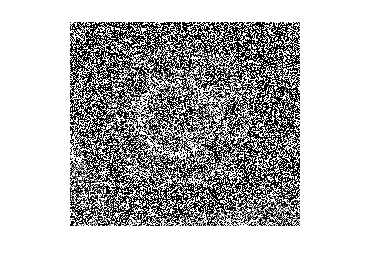

In [99]:
from PIL import Image
import numpy as np

image_path = 'mystery.png'

# Read in image and store as an array
image = np.asarray(Image.open(image_path))
if image.ndim > 2:
    # Only use first channel
    image = image[:,:,0]
print(f'Read in {image_path}. Shape: {image.shape}')
width = image.shape[1]
height = image.shape[0]
Image.fromarray(image)

Can you tell what this is an image of?

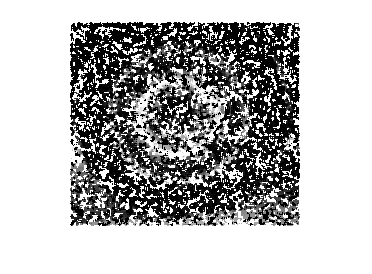

In [101]:
filter_size = np.array([3,3])
filter_rows = int((filter_size[0] - 1) / 2)
filter_cols = int((filter_size[1] - 1) / 2)
middle = int((filter_size[0] * filter_size[0] - 1) / 2)

filtered_img = np.copy(image)

for row in np.arange(0 + filter_rows, height - filter_rows):
    for col in np.arange(0 + filter_cols, width - filter_cols):
        neighborhood = np.array(image[row - filter_rows:row + filter_rows + 1, col - filter_cols:col + filter_cols + 1])
        neighborhood = np.sort(neighborhood, axis=None)
        filtered_img[row, col] = neighborhood[middle]

Image.fromarray(filtered_img)

        